# Using Unix commands to explore the dataset.

In [ ]:
#List the provided datafiles
!ls ../2019J_TMA02_data/air-quality/*

In [ ]:
#List the provided datafiles, one level deeper
!ls ../2019J_TMA02_data/air-quality/Kensington/*

In [ ]:
#List the provided datafiles, one level deeper
!ls ../2019J_TMA02_data/air-quality/Kensington/Sept-2018/Northken/

In [ ]:
#list all files
!find ../2019J_TMA02_data/air-quality/*

In [ ]:
#list all CSV files
!find ../2019J_TMA02_data/air-quality/* -name '*.csv' 

In [ ]:
#count how many CSV files is there
!find ../2019J_TMA02_data/air-quality/* -name '*.csv' | wc -l

In [ ]:
#examining one CSV file; printing first 10 lines
!head ../2019J_TMA02_data/air-quality/Kensington/April-2018/Northken/LaqnData\ \(4\).csv

In [ ]:
#applies wc -l (line count) to every CSV file, then sort the output, in order to spot outliers and patterns. 
#"-d '\n'" param to xargs assures that spaces in filenames are handled correctly
!find ../2019J_TMA02_data/air-quality/* -name '*.csv' | xargs -d '\n' wc -l | sort 

# Importing into Pandas and exploring and cleaning the content

In [1]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import itertools #used for combinatorics later on

In [2]:
furl = "../2019J_TMA02_data/air-quality/Lambeth/April-2018/BondwayInterchange/LaqnData (14).csv"

df = pd.read_csv(furl, parse_dates=['ReadingDateTime'], dayfirst=True)
df.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,LB5,NO,2018-04-01 00:00:00,52.4,ug m-3,R
1,LB5,NO,2018-04-01 01:00:00,52.4,ug m-3,R
2,LB5,NO,2018-04-01 02:00:00,52.3,ug m-3,R
3,LB5,NO,2018-04-01 03:00:00,52.5,ug m-3,R
4,LB5,NO,2018-04-01 04:00:00,52.3,ug m-3,R


In [3]:
#checking if dates and Values are correctly recognized for its data type
df.dtypes

Site                               object
Species                            object
ReadingDateTime            datetime64[ns]
Value                             float64
Units                              object
Provisional or Ratified            object
dtype: object

In [4]:
#search for unique values in all columnn, except for 'ReadingDateTime'.
#One reason why, is to check if data needs cleaning or not. NaN values were spotted.
#Print name of a coulmn, and then its unique values next to it
for column in df.columns:
    if column == 'ReadingDateTime':
        continue
    print(column, df[column].unique())

Site ['LB5']
Species ['NO' 'NO2' 'NOX' 'PM10' 'SO2']
Value [ 52.4      52.3      52.5      52.6      51.7      52.2      52.8
  51.9      50.6      49.4      48.4      46.1      44.2      42.3
  40.9      39.9      39.1      38.4      37.       36.       35.1
  34.5      34.2      33.9      33.4      33.1      31.7      31.1
  30.7      29.4      27.8      28.1      27.6      27.4      26.6
  25.9      25.4      25.2      26.       26.5      27.2      27.7
  28.2      28.4      28.6      28.7      29.       29.5      32.1
  35.2      38.5      41.3      43.2      44.9      46.4      47.9
  48.8      49.7      50.3      51.       51.1      50.8      50.2
  50.       49.8      49.1      47.4      45.4      43.1      42.
  40.4      39.3      38.6      38.7      38.       37.8      38.3
  37.4      37.1      36.6      37.5      54.       55.5      57.3
  58.       58.8      58.5      59.3      59.9      60.7      60.2
  59.4      59.6      60.       60.3      59.1      45.9      42.5
  40

Checking in below cell if eyeballing above ouput gave me correct conclusions, or if I missed something.
Checking for null/nan values (Pandas treats NaNs and null as the same, 
please see Pandas source code at 
https://github.com/pandas-dev/pandas/blob/537b65cb0fd2aa318e089c5e38f09e81d1a3fe35/pandas/core/dtypes/missing.py#L109 )

In [5]:
#please see markdown cell above for comment regarding this cell
df.isnull().any()

Site                       False
Species                    False
ReadingDateTime            False
Value                       True
Units                      False
Provisional or Ratified    False
dtype: bool

In [6]:
#displaying NaN rows
nan_rows = df[df['Value'].isnull()]
nan_rows

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
2218,LB5,PM10,2018-04-06 10:00:00,NaN,ug/m3,R
2554,LB5,PM10,2018-04-20 10:00:00,NaN,ug/m3,R
3250,LB5,SO2,2018-04-20 10:00:00,NaN,ug m-3,R


In [7]:
#dropping NaN values
df = df.dropna()

In [8]:
#investigating reason behind different values in 'Units' column
#we see that there is only one unique unit, used per 'Species' column
df_wide_units_investigation = df.pivot(index='ReadingDateTime', columns='Species', values='Units')
df_wide_units_investigation.describe()

Species,NO,NO2,NOX,PM10,SO2
count,696,696,696,694,695
unique,1,1,1,1,1
top,ug m-3,ug m-3,ug m-3 as NO2,ug/m3,ug m-3
freq,696,696,696,694,695


In [9]:
df_species_by_time = df.pivot(index='ReadingDateTime', columns='Species', values='Value')
df_species_by_time.head()

Species,NO,NO2,NOX,PM10,SO2
ReadingDateTime,,,,,
2018-04-01 00:00:00,52.4,61.1,141.39999,23.0,5.1
2018-04-01 01:00:00,52.4,61.5,141.89999,24.0,4.9
2018-04-01 02:00:00,52.3,61.3,141.50000,24.0,4.9
2018-04-01 03:00:00,52.5,61.5,142.00000,24.0,4.8
2018-04-01 04:00:00,52.3,61.4,141.70000,24.0,4.7


In [10]:
#checking for null values after pivot
df_species_by_time.isnull().any()

Species
NO      False
NO2     False
NOX     False
PM10     True
SO2      True
dtype: bool

In [11]:
#droping rows with NaN values
df_species_by_time = df_species_by_time.dropna()

In [12]:
#indentify ranges
df_species_by_time.describe()

Species,NO,NO2,NOX,PM10,SO2
count,694.0000000,694.0000000,694.0000000,694.0000000,694.0000000
mean,42.3475504,59.4572046,124.3884725,35.0994236,3.7074928
std,11.9991805,12.8791519,29.5914857,13.2378693,0.7844457
min,12.8000000,25.0000000,44.6000000,13.0000000,2.3000000
25%,35.7250000,50.6250000,108.9000000,25.0000000,3.1000000
50%,41.0000000,59.5500000,121.7000000,30.0000000,3.6000000
75%,47.9750000,64.8750000,136.6750025,44.0000000,4.3000000
max,81.3000000,105.6000000,230.1000100,64.0000000,5.5000000


In [13]:
all_possible_combinations = list(itertools.combinations(df_species_by_time.columns, 2))
all_possible_combinations

[('NO', 'NO2'),
 ('NO', 'NOX'),
 ('NO', 'PM10'),
 ('NO', 'SO2'),
 ('NO2', 'NOX'),
 ('NO2', 'PM10'),
 ('NO2', 'SO2'),
 ('NOX', 'PM10'),
 ('NOX', 'SO2'),
 ('PM10', 'SO2')]

# Investigating patterns

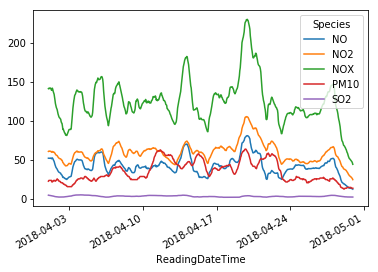

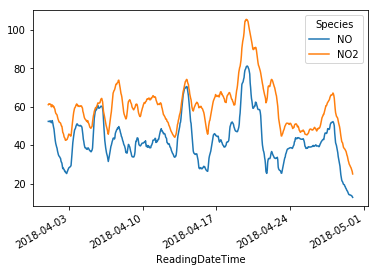

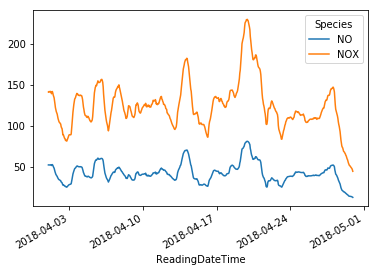

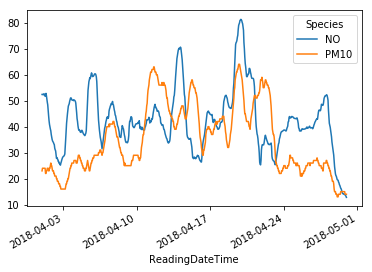

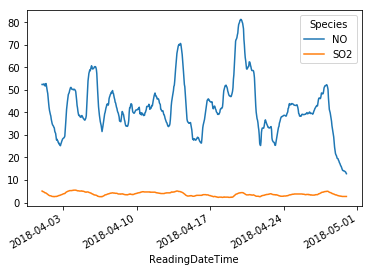

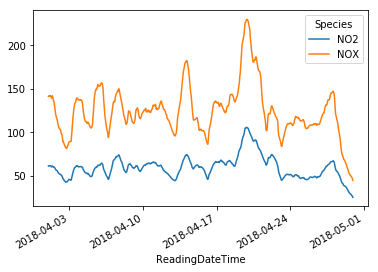

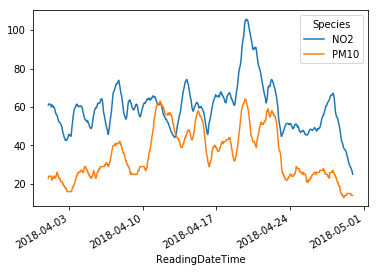

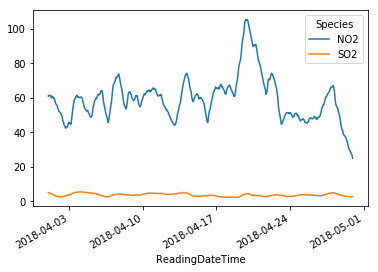

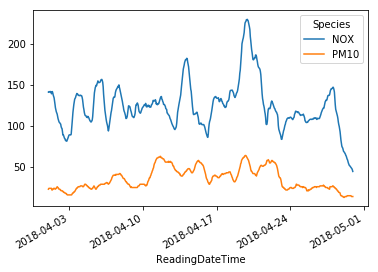

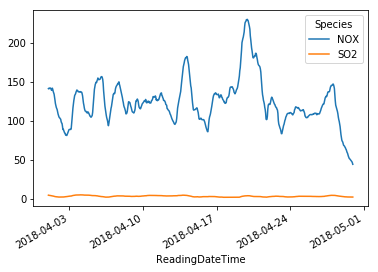

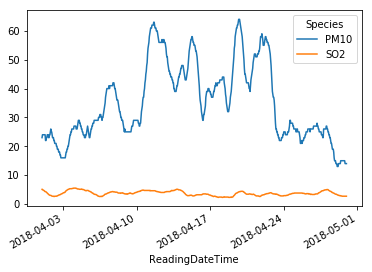

In [14]:
#plotting to get general feel of the data
df_species_by_time.plot();
#we can roughly see a non linear correlation, at least when scale allows for it.
#spearmanr will be useful when it is not possible to correlation from graph
for item in all_possible_combinations:
    df_species_by_time[[item[0],item[1]]].plot();

In [15]:
df_species_by_day = df_species_by_time.reset_index()

In [16]:
df_species_by_day = df_species_by_day.groupby(df_species_by_day['ReadingDateTime'].dt.weekday).mean()
df_species_by_day

Species,NO,NO2,NOX,PM10,SO2
ReadingDateTime,,,,,
0,34.4427083,52.6927083,105.5104165,26.7812500,3.2864583
1,41.5395833,58.4177083,122.1041662,30.2812500,3.8104167
2,43.7531250,57.2041667,124.2875006,37.0625000,3.9927083
3,49.9114583,61.9520833,138.4729166,40.6250000,3.8500000
4,51.5361702,65.9180851,144.9329787,35.9893617,3.8797872
5,44.7697917,65.3395833,133.9885410,40.0312500,3.7885417
6,33.0066667,55.7400000,106.3583333,34.9750000,3.4200000


In [17]:
#renaming days of the week
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df_species_by_day = df_species_by_day.reset_index()
df_species_by_day['ReadingDateTime'] = df_species_by_day['ReadingDateTime'].map(dayOfWeek)
df_species_by_day

Species,ReadingDateTime,NO,NO2,NOX,PM10,SO2
0,Monday,34.4427083,52.6927083,105.5104165,26.7812500,3.2864583
1,Tuesday,41.5395833,58.4177083,122.1041662,30.2812500,3.8104167
2,Wednesday,43.7531250,57.2041667,124.2875006,37.0625000,3.9927083
3,Thursday,49.9114583,61.9520833,138.4729166,40.6250000,3.8500000
4,Friday,51.5361702,65.9180851,144.9329787,35.9893617,3.8797872
5,Saturday,44.7697917,65.3395833,133.9885410,40.0312500,3.7885417
6,Sunday,33.0066667,55.7400000,106.3583333,34.9750000,3.4200000


In [18]:
#dropping the unnecessary column
df_species_by_day.index = df_species_by_day.ReadingDateTime
df_species_by_day = df_species_by_day.drop(['ReadingDateTime'], axis=1)
df_species_by_day

Species,NO,NO2,NOX,PM10,SO2
ReadingDateTime,,,,,
Monday,34.4427083,52.6927083,105.5104165,26.7812500,3.2864583
Tuesday,41.5395833,58.4177083,122.1041662,30.2812500,3.8104167
Wednesday,43.7531250,57.2041667,124.2875006,37.0625000,3.9927083
Thursday,49.9114583,61.9520833,138.4729166,40.6250000,3.8500000
Friday,51.5361702,65.9180851,144.9329787,35.9893617,3.8797872
Saturday,44.7697917,65.3395833,133.9885410,40.0312500,3.7885417
Sunday,33.0066667,55.7400000,106.3583333,34.9750000,3.4200000


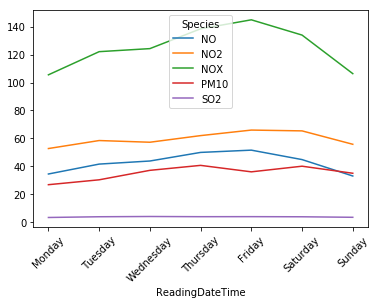

In [19]:
df_species_by_day.plot(xticks=[0,1,2,3,4,5,6], rot=45);

In [20]:
#test of independence for df_species_by_day
chi2, p, _, _ = scipy.stats.chi2_contingency(df_species_by_day)
chi2, p

(3.9562628026870037, 0.9999987799684015)

In [21]:
#test of independence for df_species_by_time
chi2, p, _, _ = scipy.stats.chi2_contingency(df_species_by_time)
chi2, p

(3034.048419165624, 0.0003095167232513462)

In [22]:
#spearmanr is able to better dectect non linear correlation, than pearsonr
#investigating correlations when grouped by day of the week
for item in all_possible_combinations:
    print(item, scipy.stats.spearmanr(df_species_by_day[item[0]],
                     df_species_by_day[item[1]]))

('NO', 'NO2') SpearmanrResult(correlation=0.8928571428571429, pvalue=0.006807187408935392)
('NO', 'NOX') SpearmanrResult(correlation=0.9642857142857145, pvalue=0.0004541491691941689)
('NO', 'PM10') SpearmanrResult(correlation=0.6785714285714287, pvalue=0.0937502539598313)
('NO', 'SO2') SpearmanrResult(correlation=0.6785714285714287, pvalue=0.0937502539598313)
('NO2', 'NOX') SpearmanrResult(correlation=0.9285714285714288, pvalue=0.0025194724037946874)
('NO2', 'PM10') SpearmanrResult(correlation=0.6071428571428572, pvalue=0.1482311614811614)
('NO2', 'SO2') SpearmanrResult(correlation=0.5357142857142858, pvalue=0.21521745567801273)
('NOX', 'PM10') SpearmanrResult(correlation=0.7500000000000002, pvalue=0.05218140045705776)
('NOX', 'SO2') SpearmanrResult(correlation=0.7142857142857144, pvalue=0.07134356146753759)
('PM10', 'SO2') SpearmanrResult(correlation=0.5357142857142858, pvalue=0.21521745567801273)


In [23]:
#spearmanr is able to better dectect non linear correlation, than pearsonr
#investigating correlations when not grouped by day of the week
for item in all_possible_combinations:
    print(item, scipy.stats.spearmanr(df_species_by_time[item[0]],
                     df_species_by_time[item[1]]))

('NO', 'NO2') SpearmanrResult(correlation=0.6327932621969122, pvalue=6.49850142254494e-79)
('NO', 'NOX') SpearmanrResult(correlation=0.9291564612038858, pvalue=2.8481711133645336e-301)
('NO', 'PM10') SpearmanrResult(correlation=0.2739115732808929, pvalue=2.0762694424332988e-13)
('NO', 'SO2') SpearmanrResult(correlation=0.383616334766456, pvalue=9.423067733463707e-26)
('NO2', 'NOX') SpearmanrResult(correlation=0.857272881667251, pvalue=1.0930298020089288e-201)
('NO2', 'PM10') SpearmanrResult(correlation=0.611264620968082, pvalue=2.4802930144320007e-72)
('NO2', 'SO2') SpearmanrResult(correlation=0.10286823377978065, pvalue=0.006682582308137983)
('NOX', 'PM10') SpearmanrResult(correlation=0.42184949127972915, pvalue=2.5541055052121396e-31)
('NOX', 'SO2') SpearmanrResult(correlation=0.30405430176647347, pvalue=2.6074456619316646e-16)
('PM10', 'SO2') SpearmanrResult(correlation=0.017966896336881182, pvalue=0.6365680351306946)
